<a href="https://www.kaggle.com/code/sabahattincag/beginner-friendly-titanic-data-preparation?scriptVersionId=137684607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


# Titanic dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.isnull().sum() / df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [7]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

**More than 99% NaN values belongs to Age and Cabin features.**

In [8]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


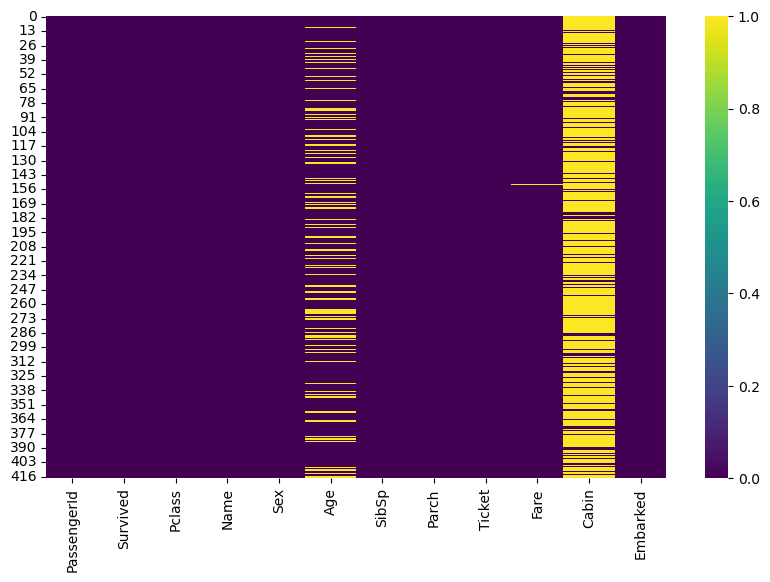

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [11]:
df.describe(include='O').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [12]:
object_col = df.select_dtypes(include='object').columns
object_col

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [13]:
for col in object_col:
    print('--'*16)
    print(df[col].value_counts(dropna=False))  # with dropna=False, strange values can be detected.
    print('--'*16)

--------------------------------
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: Name, Length: 418, dtype: int64
--------------------------------
--------------------------------
male      266
female    152
Name: Sex, dtype: int64
--------------------------------
--------------------------------
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64
--------------------------------
--------------------------------
NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
       

# Detail Examination of Columns

### **Age Column**

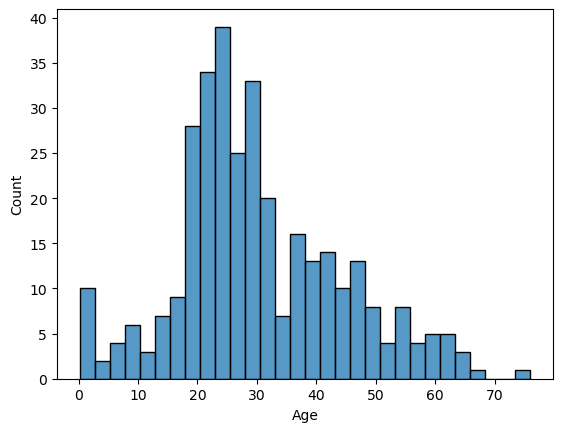

In [14]:
sns.histplot(data=df,x=df['Age'],kde=False,bins=30);

In [15]:
df.Age.mean()

30.272590361445783

In [16]:
df.Age.median()

27.0

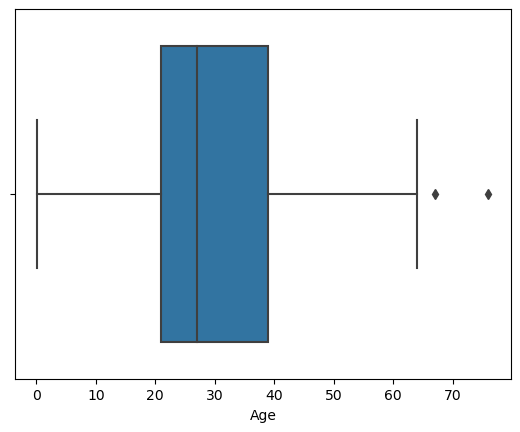

In [17]:
sns.boxplot(data=df, x='Age');

In [18]:
df.groupby('Pclass').Age.median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

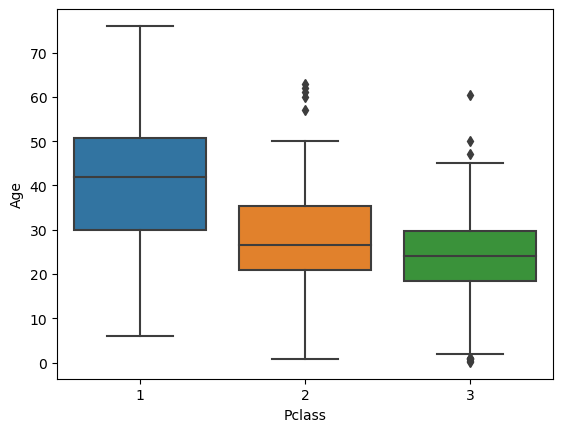

In [19]:
sns.boxplot(data=df,x='Pclass',y='Age');

In [20]:
df.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

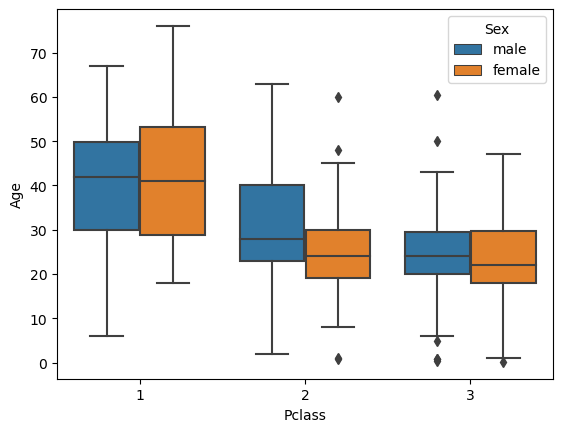

In [21]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex');

In [22]:
df.groupby(['Pclass','Sex']).Age.transform('median')

0      24.0
1      22.0
2      28.0
3      24.0
4      22.0
       ... 
413    24.0
414    41.0
415    24.0
416    24.0
417    24.0
Name: Age, Length: 418, dtype: float64

In [23]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex']).Age.transform('median'))

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Cabin

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df.drop('Cabin',axis=1,inplace=True)

In [27]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## Embarked

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Survive(Target Feature)

In [30]:
 df.Survived.value_counts(normalize=True)

0    0.635492
1    0.364508
Name: Survived, dtype: float64

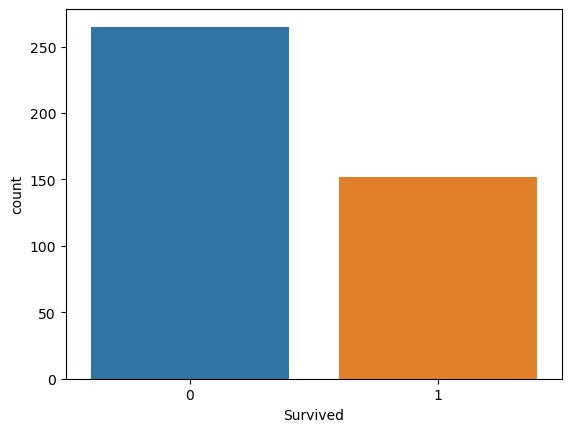

In [31]:
sns.countplot(data=df,x='Survived');

## Examining the effect of each feature on survival status

## Sex

In [32]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           152
male    0           265
Name: Survived, dtype: int64

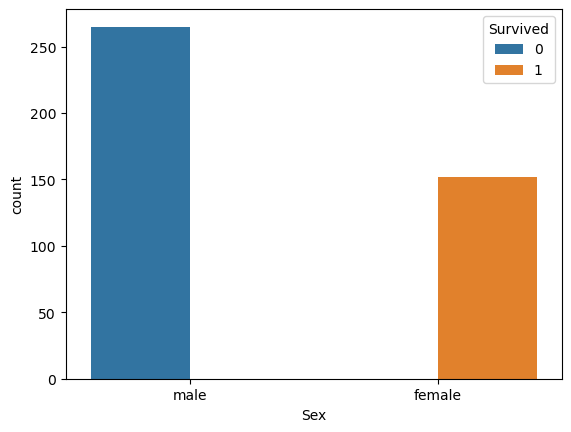

In [33]:
sns.countplot(data=df,x='Sex',hue='Survived');

In [34]:
df.groupby('Sex').Survived.value_counts(normalize=True)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64

## Pclass

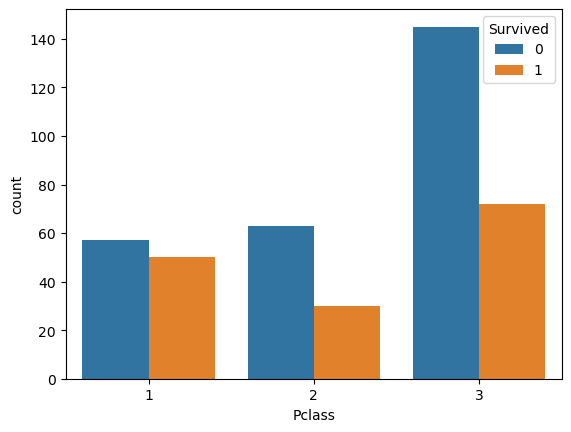

In [35]:
sns.countplot(data=df, x='Pclass', hue='Survived');

## SibSp

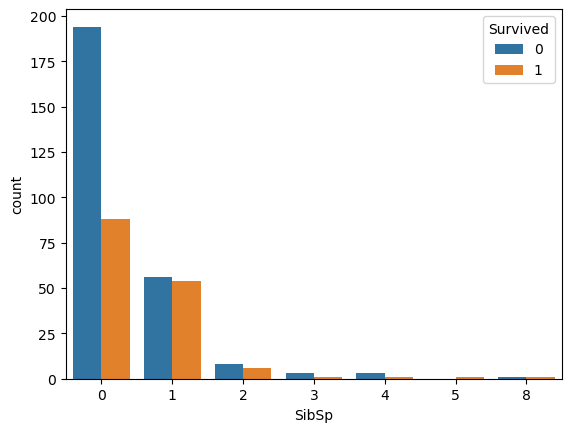

In [36]:
sns.countplot(data=df,x='SibSp',hue='Survived');

## Parch

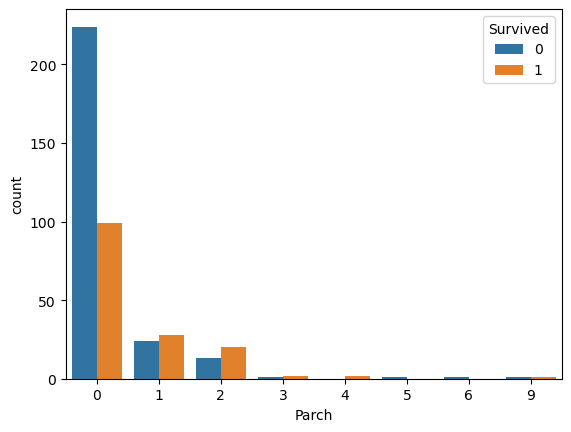

In [37]:
sns.countplot(data=df, x='Parch',hue='Survived');

## Embarked

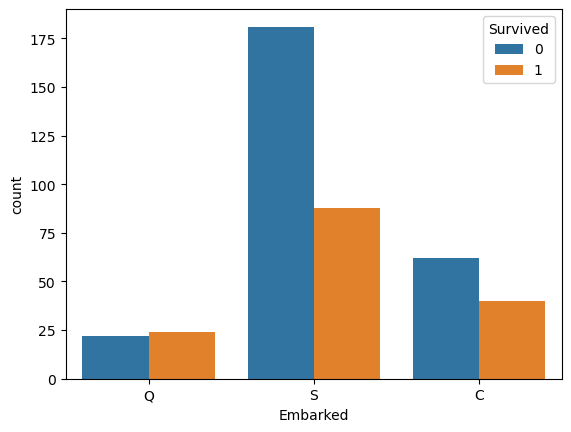

In [38]:
sns.countplot(data=df, x='Embarked',hue='Survived');

## Age

In [39]:
df.groupby('Survived').Age.median()

Survived
0    25.0
1    24.0
Name: Age, dtype: float64

In [40]:
df.groupby('Survived').Age.mean()

Survived
0    29.250604
1    29.174934
Name: Age, dtype: float64

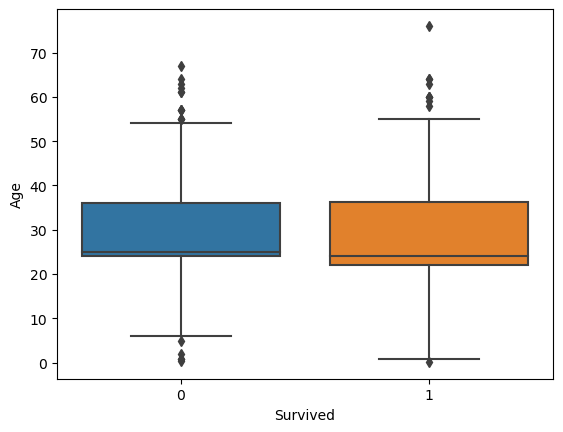

In [41]:
sns.boxplot(data=df,x='Survived',y='Age');

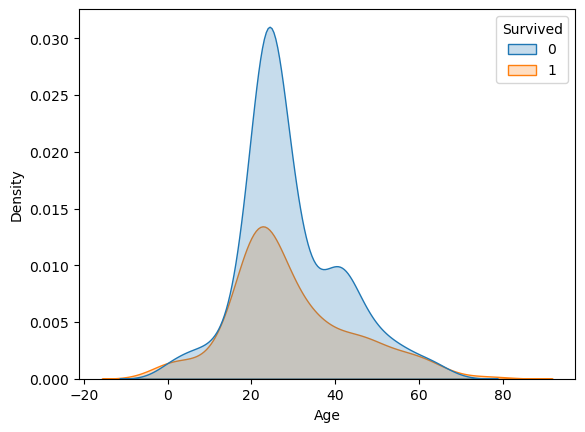

In [42]:
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True);

## Fare

In [43]:
df.groupby('Survived').Fare.median()

Survived
0    13.0000
1    21.5125
Name: Fare, dtype: float64

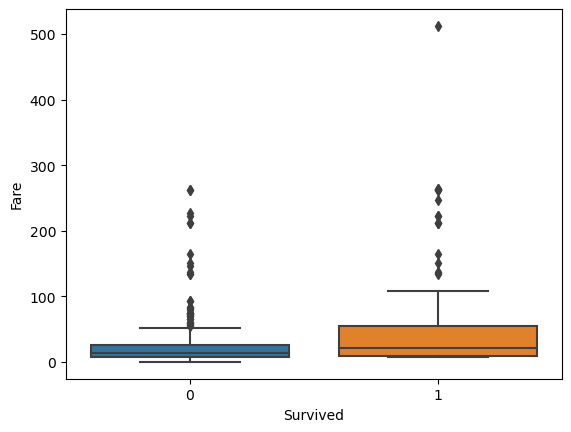

In [44]:
sns.boxplot(data=df, x='Survived',y='Fare');

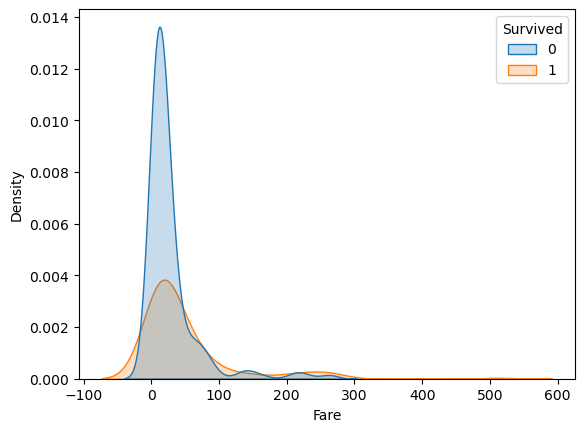

In [45]:
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True);

## Some Feature Engineering

## From "Ticket" to "is_group"

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [47]:
ticket = df.Ticket.value_counts(dropna=False)
ticket

PC 17608              5
CA. 2343              4
113503                4
SOTON/O.Q. 3101315    3
PC 17483              3
                     ..
2621                  1
4133                  1
113780                1
STON/OQ. 369943       1
2668                  1
Name: Ticket, Length: 362, dtype: int64

In [48]:
ticket[ticket!=1]

PC 17608              5
CA. 2343              4
113503                4
SOTON/O.Q. 3101315    3
PC 17483              3
16966                 3
347077                3
C.A. 31029            3
220845                3
112378                2
13508                 2
C.A. 33112            2
13695                 2
19950                 2
2650                  2
230136                2
PC 17756              2
F.C.C. 13534          2
S.O.C. 14879          2
W./C. 6607            2
350405                2
113781                2
CA 2144               2
2660                  2
CA 31352              2
29103                 2
347072                2
11778                 2
33638                 2
C 4001                2
12749                 2
13050                 2
13236                 2
315153                2
C.A. 2315             2
S.O./P.P. 2           2
24065                 2
21228                 2
28220                 2
2662                  2
A/5. 851              2
36928           

In [49]:
group_list = list(ticket[ticket!=1].index)
group_list

['PC 17608',
 'CA. 2343',
 '113503',
 'SOTON/O.Q. 3101315',
 'PC 17483',
 '16966',
 '347077',
 'C.A. 31029',
 '220845',
 '112378',
 '13508',
 'C.A. 33112',
 '13695',
 '19950',
 '2650',
 '230136',
 'PC 17756',
 'F.C.C. 13534',
 'S.O.C. 14879',
 'W./C. 6607',
 '350405',
 '113781',
 'CA 2144',
 '2660',
 'CA 31352',
 '29103',
 '347072',
 '11778',
 '33638',
 'C 4001',
 '12749',
 '13050',
 '13236',
 '315153',
 'C.A. 2315',
 'S.O./P.P. 2',
 '24065',
 '21228',
 '28220',
 '2662',
 'A/5. 851',
 '36928']

In [50]:
True*1

1

In [51]:
False*1

0

In [52]:
df['is_group'] = df.Ticket.isin(group_list)*1
df['is_group']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: is_group, Length: 417, dtype: int64

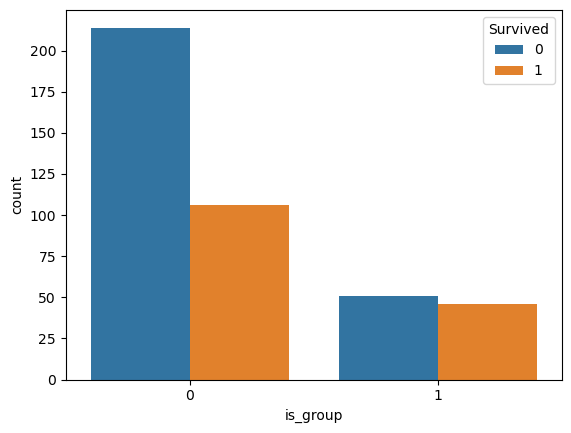

In [53]:
sns.countplot(data=df, x='is_group',hue='Survived');

## From "SibSp" and "Parch" "to is_alone"

In [54]:
df.SibSp

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: SibSp, Length: 417, dtype: int64

In [55]:
df.Parch

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    0
415    0
416    0
417    1
Name: Parch, Length: 417, dtype: int64

In [56]:
df['is_alone'] =((df.SibSp == 0) & (df.Parch == 0))*1
df.is_alone

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    1
415    1
416    1
417    0
Name: is_alone, Length: 417, dtype: int64

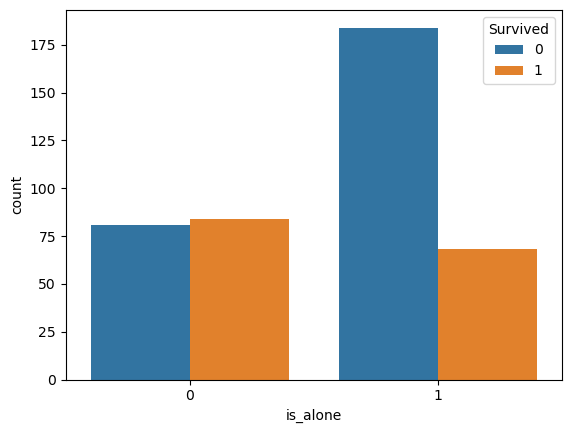

In [57]:
sns.countplot(data=df, x='is_alone',hue='Survived');

## Relationship between 'is_alone' and 'is_group'

In [58]:
df.groupby('is_group').is_alone.value_counts()

is_group  is_alone
0         1           231
          0            89
1         0            76
          1            21
Name: is_alone, dtype: int64

## Implementing some methods on 'Name' and 'Ticket

In [59]:
df.Name

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 417, dtype: object

In [60]:
df.Name.sample(10)

115                          Chronopoulos, Mr. Demetrios
142                           Ryerson, Mr. Arthur Larned
308                           Hays, Mr. Charles Melville
175                            Brown, Miss. Edith Eileen
85                                    Khalil, Mr. Betros
328                        Clarke, Mr. Charles Valentine
340                        Fillbrook, Mr. Joseph Charles
113                             Buckley, Miss. Katherine
143                           Beauchamp, Mr. Henry James
96     Cavendish, Mrs. Tyrell William (Julia Florence...
Name: Name, dtype: object

In [61]:
df.Name.str.split(',').str[1].str.split("(").str[0].str.split('"').str[0].str.split('.').str[1].str.strip()

0                James
1                James
2       Thomas Francis
3               Albert
4            Alexander
            ...       
413              Woolf
414            Fermina
415    Simon Sivertsen
416          Frederick
417          Michael J
Name: Name, Length: 417, dtype: object

In [62]:
df.Name.str.extract("\w+\.\s(\w*\s*\w*)" )

,0
0,James
1,James
2,Thomas Francis
3,Albert
4,Alexander
...,...
413,Woolf
414,Fermina
415,Simon Sivertsen
416,Frederick


In [63]:
df['Name'] =  df.Name.str.extract("\w+\.\s(\w*\s*\w*)" )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,892,0,3,James,male,34.5,0,0,330911,7.8292,Q,0,1
1,893,1,3,James,female,47.0,1,0,363272,7.0000,S,0,0
2,894,0,2,Thomas Francis,male,62.0,0,0,240276,9.6875,Q,0,1
3,895,0,3,Albert,male,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,Alexander,female,22.0,1,1,3101298,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,Woolf,male,24.0,0,0,A.5. 3236,8.0500,S,0,1
414,1306,1,1,Fermina,female,39.0,0,0,PC 17758,108.9000,C,0,1
415,1307,0,3,Simon Sivertsen,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,1
416,1308,0,3,Frederick,male,24.0,0,0,359309,8.0500,S,0,1


## Ticket

In [64]:
df.Ticket.str.extract("(\d*)$")

,0
0,330911
1,363272
2,240276
3,315154
4,3101298
...,...
413,3236
414,17758
415,3101262
416,359309


In [65]:
df["Ticket"] = df.Ticket.str.extract("(\d*)$")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,is_group,is_alone
0,892,0,3,James,male,34.5,0,0,330911,7.8292,Q,0,1
1,893,1,3,James,female,47.0,1,0,363272,7.0000,S,0,0
2,894,0,2,Thomas Francis,male,62.0,0,0,240276,9.6875,Q,0,1
3,895,0,3,Albert,male,27.0,0,0,315154,8.6625,S,0,1
4,896,1,3,Alexander,female,22.0,1,1,3101298,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,Woolf,male,24.0,0,0,3236,8.0500,S,0,1
414,1306,1,1,Fermina,female,39.0,0,0,17758,108.9000,C,0,1
415,1307,0,3,Simon Sivertsen,male,38.5,0,0,3101262,7.2500,S,0,1
416,1308,0,3,Frederick,male,24.0,0,0,359309,8.0500,S,0,1


## Dropping unnecessary features

In [66]:
df_final = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_group,is_alone
0,0,3,male,34.5,0,0,7.8292,Q,0,1
1,1,3,female,47.0,1,0,7.0000,S,0,0
2,0,2,male,62.0,0,0,9.6875,Q,0,1
3,0,3,male,27.0,0,0,8.6625,S,0,1
4,1,3,female,22.0,1,1,12.2875,S,0,0
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,0,0,8.0500,S,0,1
414,1,1,female,39.0,0,0,108.9000,C,0,1
415,0,3,male,38.5,0,0,7.2500,S,0,1
416,0,3,male,24.0,0,0,8.0500,S,0,1


/tmp/ipykernel_20/1323895288.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_final.corr(), annot=True);


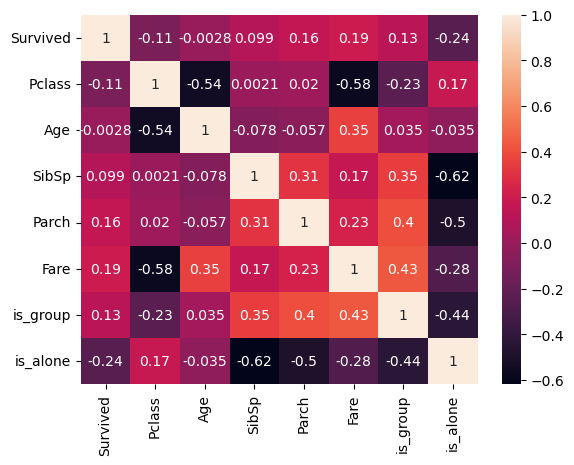

In [67]:
sns.heatmap(df_final.corr(), annot=True);

In [68]:
df_final = df_final.drop(["SibSp", "Parch"], axis=1)
df_final

,Survived,Pclass,Sex,Age,Fare,Embarked,is_group,is_alone
0,0,3,male,34.5,7.8292,Q,0,1
1,1,3,female,47.0,7.0000,S,0,0
2,0,2,male,62.0,9.6875,Q,0,1
3,0,3,male,27.0,8.6625,S,0,1
4,1,3,female,22.0,12.2875,S,0,0
...,...,...,...,...,...,...,...,...
413,0,3,male,24.0,8.0500,S,0,1
414,1,1,female,39.0,108.9000,C,0,1
415,0,3,male,38.5,7.2500,S,0,1
416,0,3,male,24.0,8.0500,S,0,1


## Dummy Operation

In [69]:
df_dummy = pd.get_dummies(data=df_final, drop_first=True)
df_dummy

,Survived,Pclass,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,7.8292,0,1,1,1,0
1,1,3,47.0,7.0000,0,0,0,0,1
2,0,2,62.0,9.6875,0,1,1,1,0
3,0,3,27.0,8.6625,0,1,1,0,1
4,1,3,22.0,12.2875,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,0,3,24.0,8.0500,0,1,1,0,1
414,1,1,39.0,108.9000,0,1,0,0,0
415,0,3,38.5,7.2500,0,1,1,0,1
416,0,3,24.0,8.0500,0,1,1,0,1


In [70]:
df_dummy = pd.get_dummies(data=df_dummy, columns=["Pclass"], drop_first=True)
df_dummy

,Survived,Age,Fare,is_group,is_alone,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,34.5,7.8292,0,1,1,1,0,0,1
1,1,47.0,7.0000,0,0,0,0,1,0,1
2,0,62.0,9.6875,0,1,1,1,0,1,0
3,0,27.0,8.6625,0,1,1,0,1,0,1
4,1,22.0,12.2875,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,0,24.0,8.0500,0,1,1,0,1,0,1
414,1,39.0,108.9000,0,1,0,0,0,0,0
415,0,38.5,7.2500,0,1,1,0,1,0,1
416,0,24.0,8.0500,0,1,1,0,1,0,1


## The End